# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="



url_list = []
working_cities = []
working_cities_url = []
unfindable_cities_url = []
unfindable_cities = []

for city in cities:
    url = base_url + city + "&appid=" + weather_api_key
    url_list.append(url)
    status = requests.get(url).status_code
    if status == 200:
        working_cities.append(city)
        working_cities_url.append(url)
    else:
        unfindable_cities.append(city)
        unfindable_cities_url.append(url)

In [4]:
print(f'The cities that work are {working_cities}')
print(f'The cities that were unable to be found are {unfindable_cities}')

The cities that work are ['vila franca do campo', 'georgetown', 'shimoda', 'hermanus', 'rikitea', 'longyearbyen', 'hilo', 'ponta do sol', 'barrow', 'faya', 'ushuaia', 'norman wells', 'hovd', 'kisangani', 'dunedin', 'altamira', 'yellowknife', 'saskylakh', 'nikolskoye', 'asau', 'hobart', 'busselton', 'vaini', 'chokurdakh', 'iberia', 'atuona', 'fraserburgh', 'tabou', 'punta arenas', 'tuktoyaktuk', 'manokwari', 'pilibhit', 'leh', 'bredasdorp', 'kulhudhuffushi', 'key largo', 'kachug', 'port lincoln', 'mazagao', 'kapaa', 'ko samui', 'amberley', 'la ronge', 'daokou', 'avarua', 'atlantic city', 'salalah', 'esperance', 'castro', 'upernavik', 'faanui', 'belmonte', 'breznik', 'mataura', 'chenghai', 'hofn', 'kodiak', 'mitu', 'dingle', 'emerald', 'pevek', 'pinawa', 'kahului', 'la palma', 'vilyuysk', 'chico', 'port alfred', 'wahpeton', 'dikson', 'yibin', 'kenai', 'emborion', 'sorong', 'santiago del estero', 'cape town', 'bandundu', 'buy', 'albany', 'boddam', 'rochester', 'beloha', 'constitucion', 'i

In [5]:
json_data = []
for cities in working_cities_url:
    city_data = requests.get(cities).json()
    json_data.append(city_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
len(json_data)

554

In [9]:
key_list = ["name", "latitude", "longitude", "humidity", "max_temp", "cloudiness", "wind_speed"]
weather_dict = {key: [] for key in key_list}


for data in json_data:
    name = data['name']
    latitude = data['coord']['lat']
    longitude = data['coord']['lon']
    humidity = data['main']['humidity']
    max_temp = data['main']['temp_max']
    cloudiness = data['clouds']['all']
    wind_speed = data['wind']['speed']
    
    weather_dict['name'].append(name)
    weather_dict['latitude'].append(latitude)
    weather_dict['longitude'].append(longitude)
    weather_dict['humidity'].append(humidity)
    weather_dict['max_temp'].append(max_temp)
    weather_dict['cloudiness'].append(cloudiness)
    weather_dict['wind_speed'].append(wind_speed)
    


    
    

weather_df = pd.DataFrame.from_dict(weather_dict)
weather_df

,name,latitude,longitude,humidity,max_temp,cloudiness,wind_speed
0,Vila Franca do Campo,37.7167,-25.4333,71,298.38,86,5.15
1,George Town,5.4112,100.3354,79,301.12,20,2.06
2,Shimoda,34.6667,138.9500,89,299.55,94,2.17
3,Hermanus,-34.4187,19.2345,72,293.09,0,3.76
4,Rikitea,-23.1203,-134.9692,66,293.81,56,9.66
...,...,...,...,...,...,...,...
549,Yar-Sale,66.8333,70.8333,50,299.01,97,6.60
550,Liyang,29.7057,118.2862,92,299.12,100,1.29
551,Kaputa,-8.4689,29.6619,38,302.57,92,4.86
552,Alice Springs,-23.7000,133.8833,34,281.90,92,1.54


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
for humidities in weather_df['humidity']:
    if humidities > 100:
        print ('There is a humidity more than 100')

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
weather_df.to_csv('weather_data.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

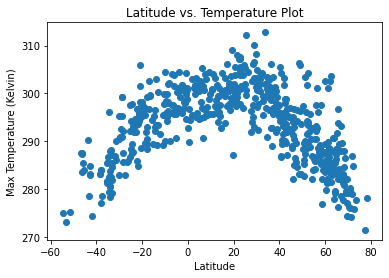

In [11]:
plt.scatter(weather_df['latitude'], weather_df['max_temp'])
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin)")
plt.show()

## Latitude vs. Humidity Plot

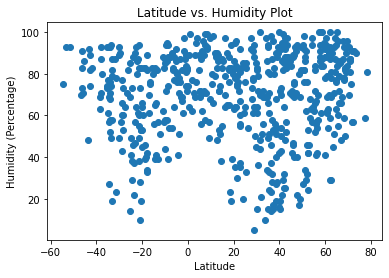

In [12]:
plt.scatter(weather_df['latitude'], weather_df['humidity'])
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (Percentage)")
plt.show()

## Latitude vs. Cloudiness Plot

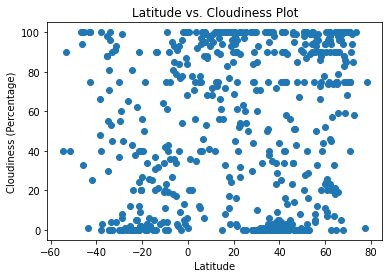

In [13]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'])
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (Percentage)")
plt.show()

## Latitude vs. Wind Speed Plot

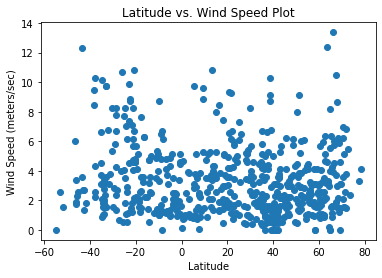

In [14]:
plt.scatter(weather_df['latitude'], weather_df['wind_speed'])
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters/sec)")
plt.show()

## Linear Regression

In [20]:
north_hemisphere_df = weather_df.loc[weather_df["latitude"] >= 0]
south_hemisphere_df = weather_df.loc[weather_df["latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

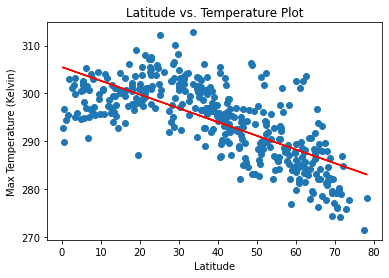

In [25]:
x = north_hemisphere_df['latitude']
y = north_hemisphere_df['max_temp']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin)")
plt.plot(x, m*x+b, 'red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

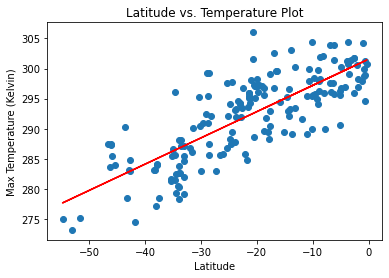

In [27]:
x = south_hemisphere_df['latitude']
y = south_hemisphere_df['max_temp']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin)")
plt.plot(x, m*x+b, 'red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

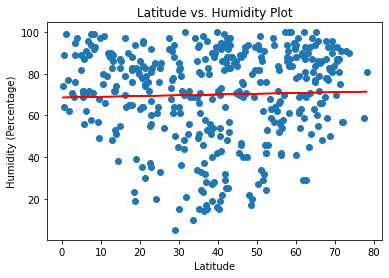

In [32]:
x = north_hemisphere_df['latitude']
y = north_hemisphere_df['humidity']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (Percentage)")
plt.plot(x, m*x+b, 'red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

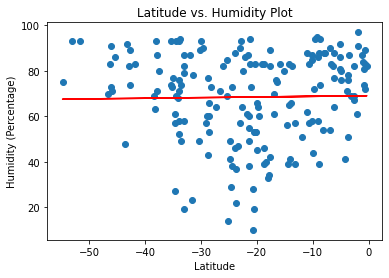

In [41]:
x = south_hemisphere_df['latitude']
y = south_hemisphere_df['humidity']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (Percentage)")
plt.plot(x, m*x+b, 'red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

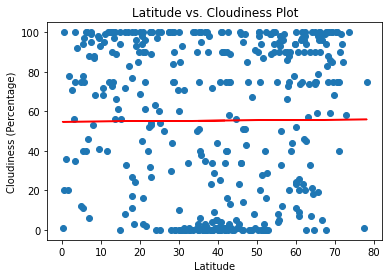

In [35]:
x = north_hemisphere_df['latitude']
y = north_hemisphere_df['cloudiness']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (Percentage)")
plt.plot(x, m*x+b, 'red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

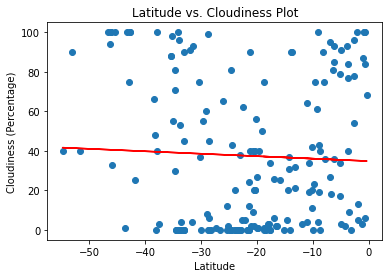

In [43]:
x = south_hemisphere_df['latitude']
y = south_hemisphere_df['cloudiness']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (Percentage)")
plt.plot(x, m*x+b, 'red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

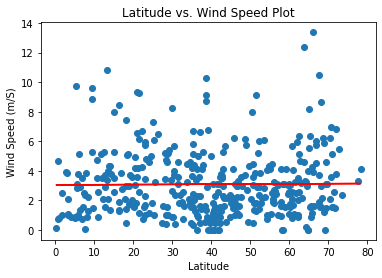

In [39]:
x = north_hemisphere_df['latitude']
y = north_hemisphere_df['wind_speed']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/S)")
plt.plot(x, m*x+b, 'red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

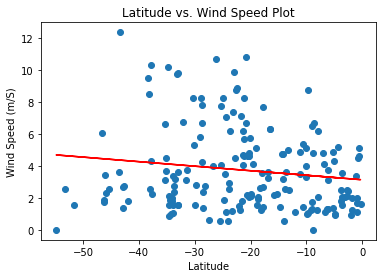

In [45]:
x = south_hemisphere_df['latitude']
y = south_hemisphere_df['wind_speed']

m,b = np.polyfit(x,y,1)

plt.scatter(x, y)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/S)")
plt.plot(x, m*x+b, 'red')
plt.show()

#### Observable Trends

Trend 1: For the northern hemisphere, as the latitude goes up, the max temperature goes down. Essentially it is colder the farther from the equator you are.

Trend 2: For the sourthern hemisphere, as the latitude goes up, the max temperature goes up. Essentially it is warmer the closer to the equator you are.

Trend 3: Wind speed doesn't seem to change with latitude for both the northern and southern hemisphere